<a href="https://colab.research.google.com/github/isalut/PROJECT/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
# Load the dataset
file_path = r"/content/kdd_train.csv"
df = pd.read_csv(file_path)
df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
# Encode categorical columns
categorical_cols = ["protocol_type", "service", "flag"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Encode the target variable (binary classification: DDoS vs Normal)
df["labels"] = df["labels"].apply(lambda x: 1 if x != "normal" else 0)  # 1 for attack, 0 for normal

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = df.columns[:-1]  # Exclude target column
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [ ]:
print("encoded data:")
df

encoded data:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.110249,-0.124706,-0.686785,0.751111,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0
1,-0.110249,2.219312,0.781428,0.751111,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
2,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1
3,-0.110249,-0.124706,-0.442083,0.751111,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0
4,-0.110249,-0.124706,-0.442083,0.751111,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1
125969,-0.107178,2.219312,1.087305,0.751111,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
125970,-0.110249,-0.124706,1.393183,0.751111,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,0
125971,-0.110249,-0.124706,-0.075030,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1


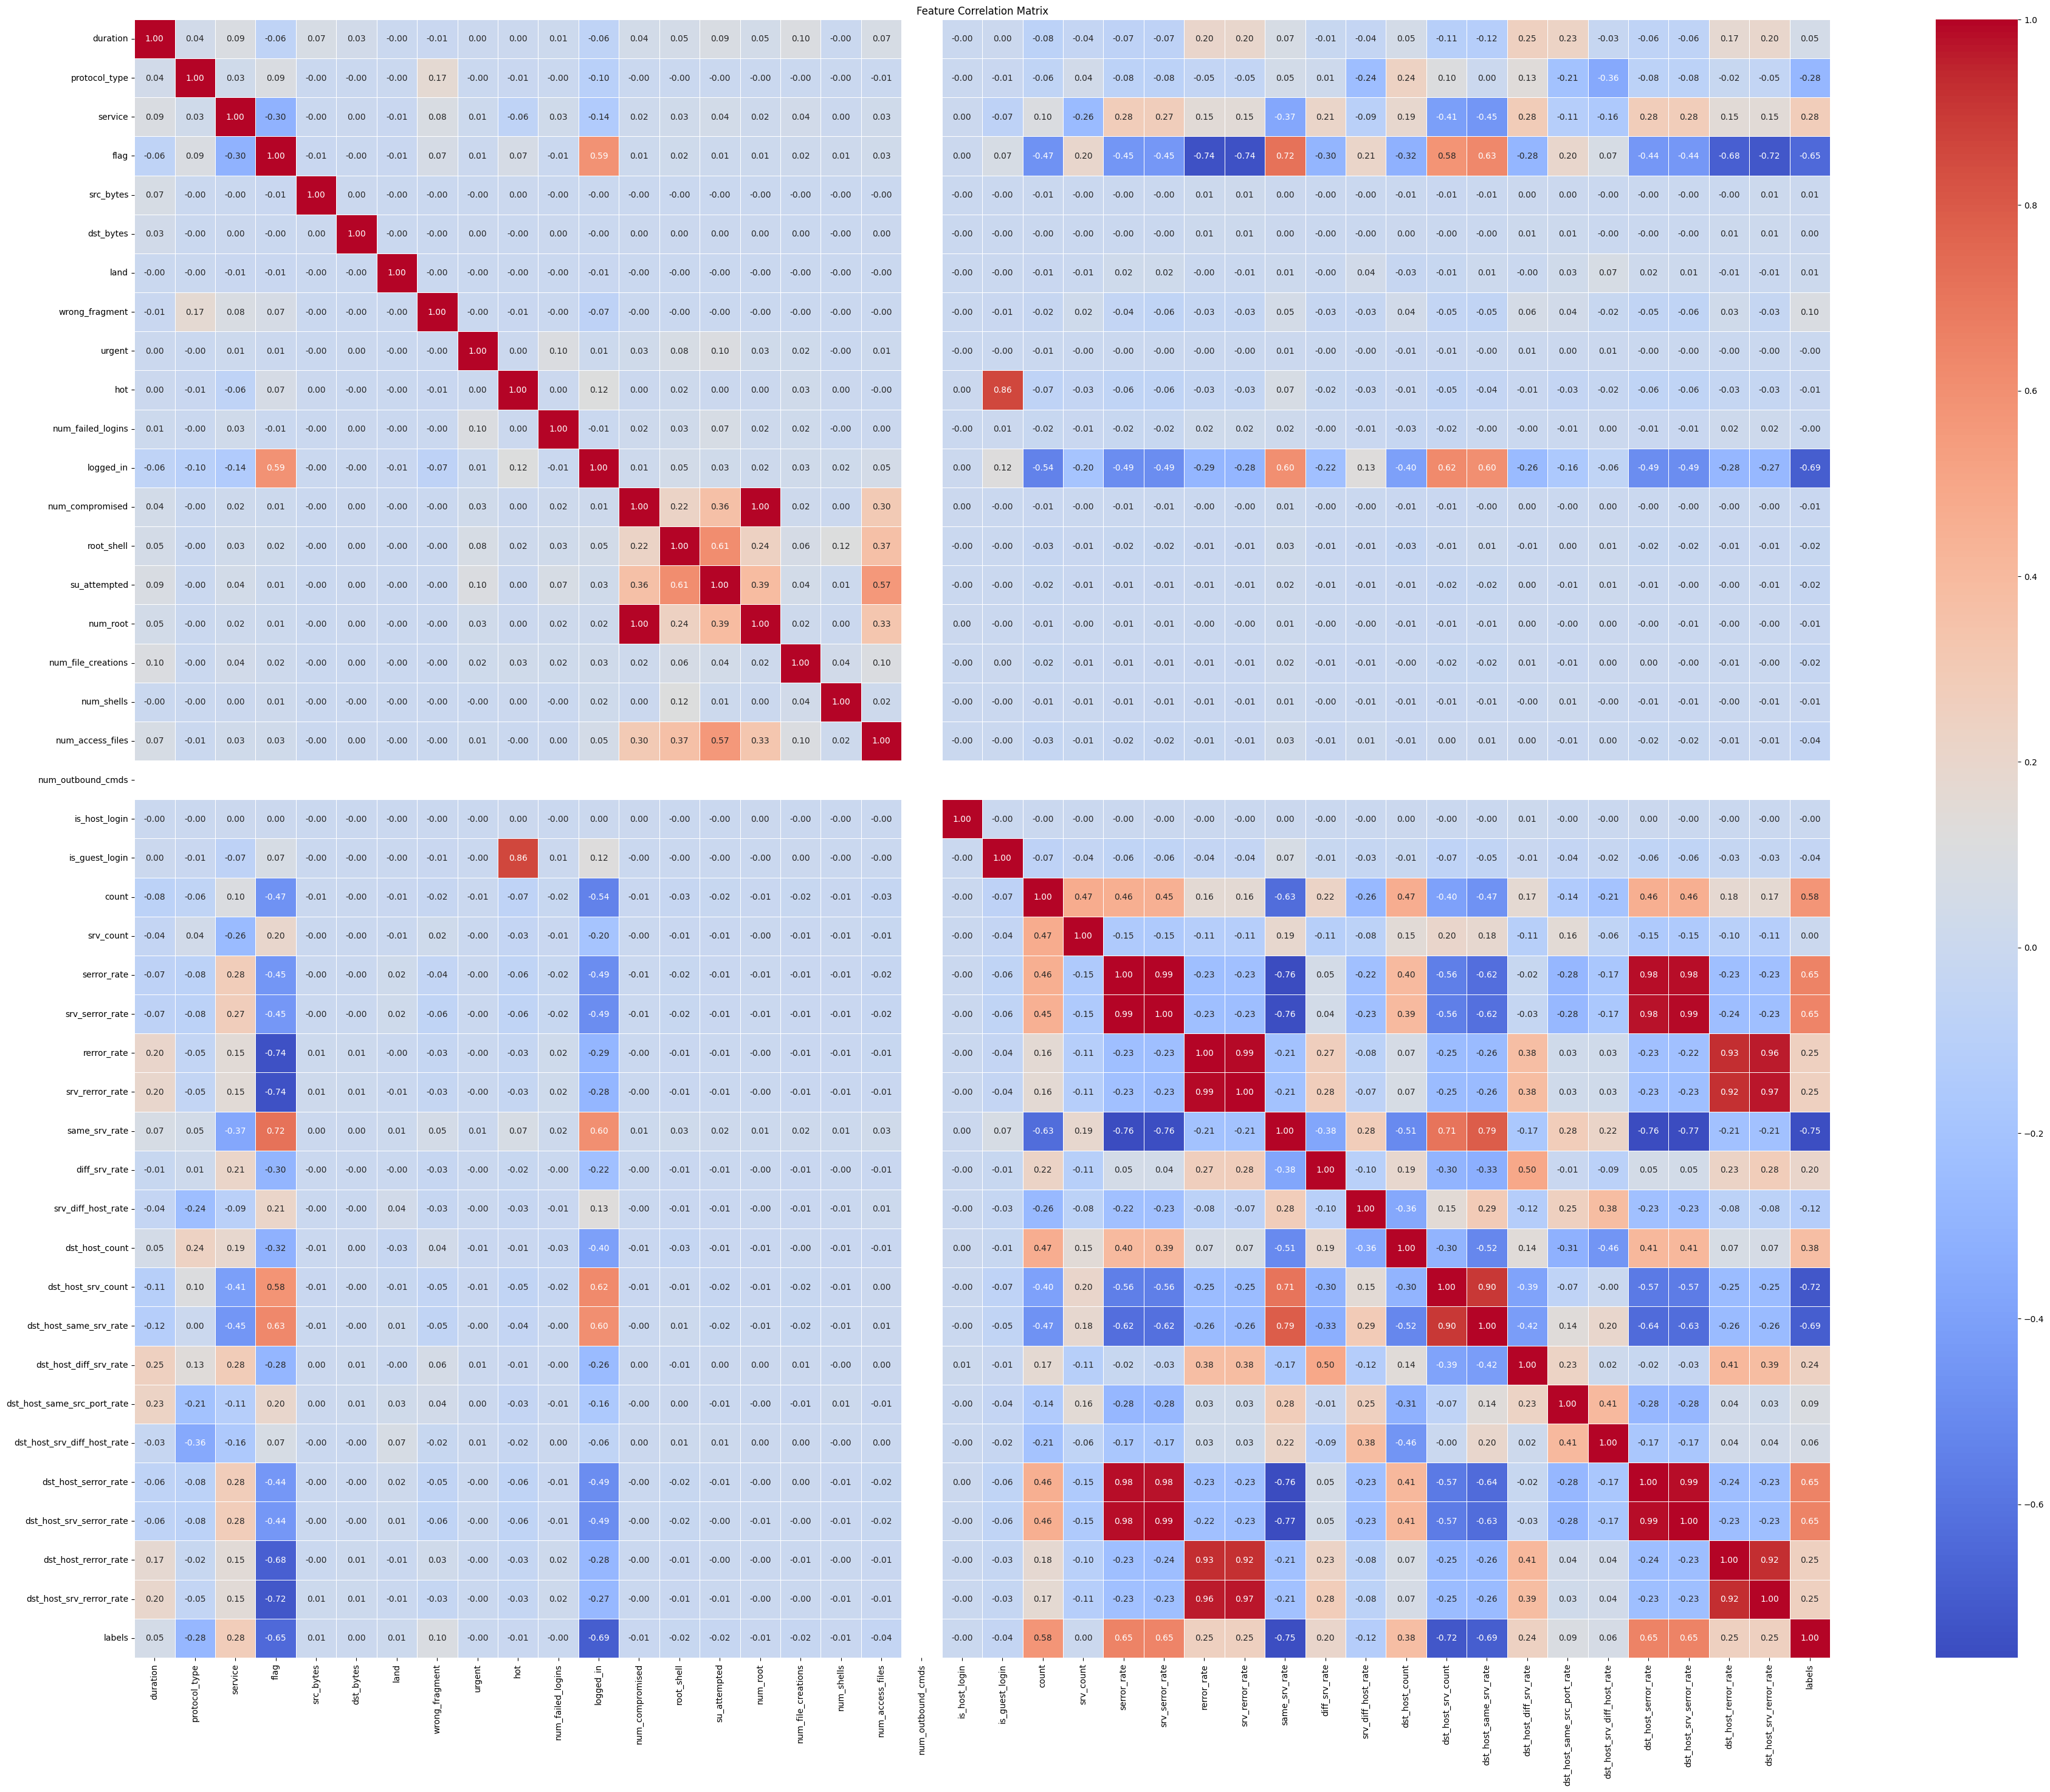

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(45,35))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size":10},
    cbar=True
)
plt.title("Feature Correlation Matrix")
plt.show()



In [ ]:
# Select features highly correlated with the target variable
correlation_threshold = 0.05  # Drop features with absolute correlation less than this value
correlated_features = correlation_matrix["labels"].abs().sort_values(ascending=False)

not_selected_features = correlated_features[correlated_features < correlation_threshold].index.tolist()

# Display the selected features
print("Selected Features for Model Training:\n", not_selected_features)


Selected Features for Model Training:
 ['duration', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'land', 'src_bytes', 'dst_bytes', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count']


In [ ]:
selected_features = correlated_features[correlated_features > correlation_threshold].index.tolist()
# Drop low-correlation features
df = df[selected_features]

# Display the selected features
print("Selected Features for Model Training:\n", selected_features)

Selected Features for Model Training:
 ['labels', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'flag', 'count', 'dst_host_count', 'protocol_type', 'service', 'srv_rerror_rate', 'dst_host_srv_rerror_rate', 'rerror_rate', 'dst_host_rerror_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'wrong_fragment', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']


In [ ]:
df

,labels,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag,...,srv_rerror_rate,dst_host_srv_rerror_rate,rerror_rate,dst_host_rerror_rate,dst_host_diff_srv_rate,diff_srv_rate,srv_diff_host_rate,wrong_fragment,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0.771283,-0.818890,-0.782367,-0.809262,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,...,-0.374432,-0.376387,-0.374362,-0.224532,-0.280282,-0.349683,-0.374560,-0.089486,0.069972,-0.289103
1,0,-1.321428,-1.035688,-1.161030,-0.809262,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,...,-0.374432,-0.376387,-0.374362,-0.387635,2.736852,0.482201,-0.374560,-0.089486,2.367737,-0.289103
2,1,-1.389669,-0.809857,-0.938287,-0.809262,1.618955,1.608759,1.602664,1.605104,-0.736235,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.174417,0.038529,-0.374560,-0.089486,-0.480197,-0.289103
3,0,0.771283,1.258754,1.066401,1.235694,-0.602433,-0.572083,-0.189235,-0.184522,0.751111,...,-0.374432,-0.345084,-0.374362,-0.387635,-0.439078,-0.349683,-0.374560,-0.089486,-0.383108,0.066252
4,0,0.771283,1.258754,1.066401,1.235694,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.439078,-0.349683,-0.028179,-0.089486,-0.480197,-0.289103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,-1.184947,-0.818890,-0.938287,-0.809262,1.618955,1.608759,1.602664,1.605104,-0.736235,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.121485,-0.016930,-0.374560,-0.089486,-0.480197,-0.289103
125969,0,0.771283,1.159389,0.977304,-0.809262,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.386146,-0.349683,-0.374560,-0.089486,-0.447834,-0.289103
125970,0,0.771283,-0.773724,-0.893738,1.235694,-0.624871,0.979238,-0.637209,-0.631929,0.751111,...,-0.374432,-0.376387,-0.374362,-0.355014,-0.121485,-0.349683,-0.374560,-0.089486,-0.480197,-0.289103
125971,1,-1.366922,-0.972455,-1.094207,-0.809262,1.618955,1.608759,1.602664,1.605104,-0.736235,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.174417,-0.072389,-0.374560,-0.089486,-0.480197,-0.289103


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X = df.drop(columns=["labels"])
y = df["labels"]



In [ ]:
X

,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag,count,...,srv_rerror_rate,dst_host_srv_rerror_rate,rerror_rate,dst_host_rerror_rate,dst_host_diff_srv_rate,diff_srv_rate,srv_diff_host_rate,wrong_fragment,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.771283,-0.818890,-0.782367,-0.809262,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,-0.717045,...,-0.374432,-0.376387,-0.374362,-0.224532,-0.280282,-0.349683,-0.374560,-0.089486,0.069972,-0.289103
1,-1.321428,-1.035688,-1.161030,-0.809262,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,-0.620982,...,-0.374432,-0.376387,-0.374362,-0.387635,2.736852,0.482201,-0.374560,-0.089486,2.367737,-0.289103
2,-1.389669,-0.809857,-0.938287,-0.809262,1.618955,1.608759,1.602664,1.605104,-0.736235,0.339648,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.174417,0.038529,-0.374560,-0.089486,-0.480197,-0.289103
3,0.771283,1.258754,1.066401,1.235694,-0.602433,-0.572083,-0.189235,-0.184522,0.751111,-0.690846,...,-0.374432,-0.345084,-0.374362,-0.387635,-0.439078,-0.349683,-0.374560,-0.089486,-0.383108,0.066252
4,0.771283,1.258754,1.066401,1.235694,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,-0.472521,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.439078,-0.349683,-0.028179,-0.089486,-0.480197,-0.289103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-1.184947,-0.818890,-0.938287,-0.809262,1.618955,1.608759,1.602664,1.605104,-0.736235,0.872361,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.121485,-0.016930,-0.374560,-0.089486,-0.480197,-0.289103
125969,0.771283,1.159389,0.977304,-0.809262,-0.624871,-0.639532,-0.637209,-0.631929,0.751111,-0.717045,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.386146,-0.349683,-0.374560,-0.089486,-0.447834,-0.289103
125970,0.771283,-0.773724,-0.893738,1.235694,-0.624871,0.979238,-0.637209,-0.631929,0.751111,-0.725778,...,-0.374432,-0.376387,-0.374362,-0.355014,-0.121485,-0.349683,-0.374560,-0.089486,-0.480197,-0.289103
125971,-1.366922,-0.972455,-1.094207,-0.809262,1.618955,1.608759,1.602664,1.605104,-0.736235,0.523041,...,-0.374432,-0.376387,-0.374362,-0.387635,-0.174417,-0.072389,-0.374560,-0.089486,-0.480197,-0.289103


In [ ]:
y

,labels
0,0
1,0
2,1
3,0
4,0
...,...
125968,1
125969,0
125970,0
125971,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Hybrid Model Accuracy: 0.9944036515181583
Classification Report:
   precision    recall  f1-score
0   0.992754  0.996807  0.994776
1   0.996316  0.991643  0.993974


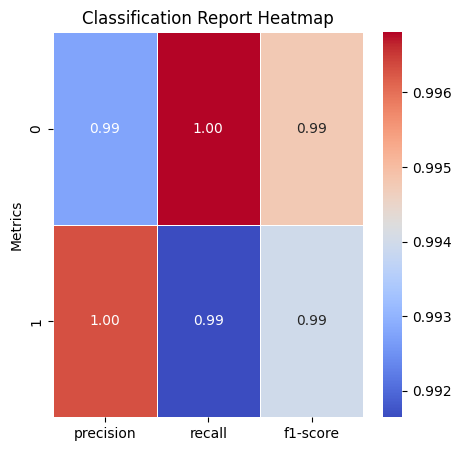

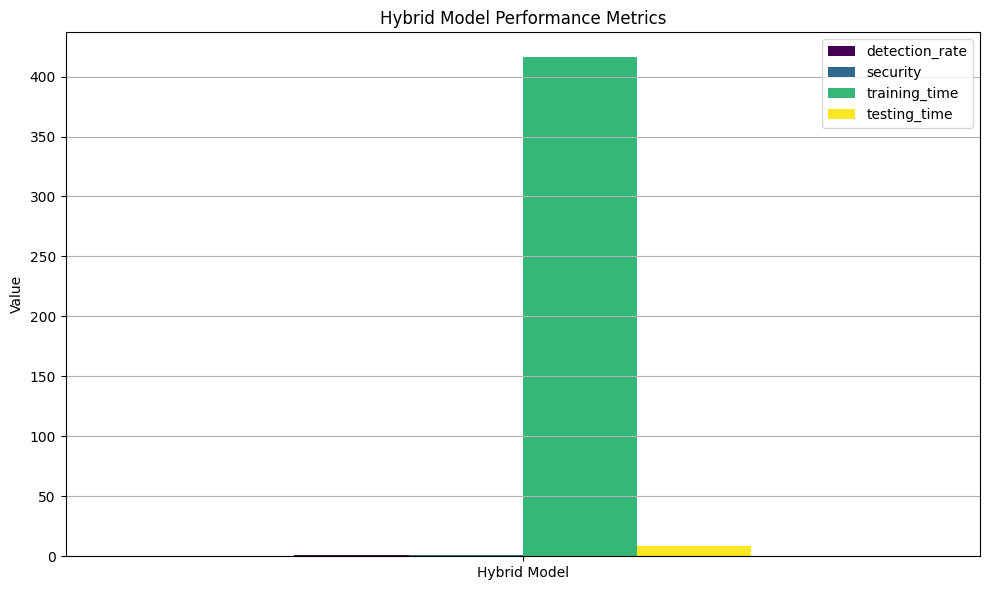

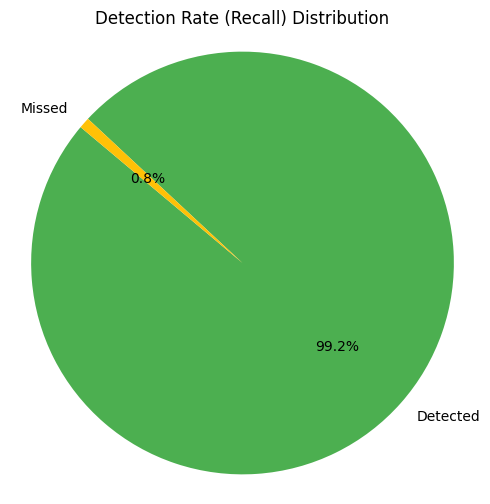

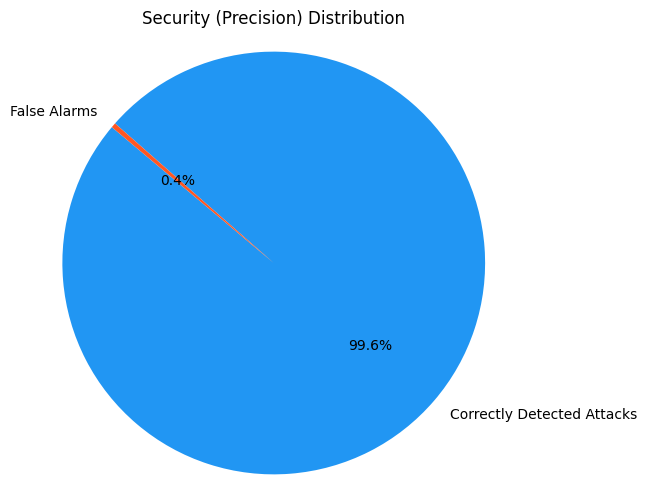

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.svm import SVC # Import SVC
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# --- Initialize SVM and Random Forest models ---
svm_model = SVC(probability=True)  # Create an instance of the SVM classifier with probability estimates enabled
rf_model = RandomForestClassifier()  # Create an instance of the Random Forest classifier


# --- Measure training time for SVM ---
start_svm_train = time.time()
svm_model.fit(X_train, y_train)
svm_train_time = time.time() - start_svm_train

# --- Measure training time for Random Forest ---
start_rf_train = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_rf_train

# Total training time
training_time = svm_train_time + rf_train_time

# --- Measure testing time and make predictions ---
start_test = time.time()
svm_probs = svm_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

final_probs = (svm_probs + rf_probs) / 2
final_predictions = (final_probs >= 0.5).astype(int)
testing_time = time.time() - start_test

# --- Calculate evaluation metrics ---
detection_rate = recall_score(y_test, final_predictions)
security = precision_score(y_test, final_predictions)
accuracy = accuracy_score(y_test, final_predictions)

# Store metrics
metrics = {
    'detection_rate': [detection_rate],
    'security': [security],
    'training_time': [training_time],
    'testing_time': [testing_time]
}

# --- Classification report as heatmap ---
classification_rep = classification_report(y_test, final_predictions, output_dict=True)
classification_df = pd.DataFrame(classification_rep).T
classification_df = classification_df.drop(["accuracy", "macro avg", "weighted avg"], errors="ignore")
classification_df = classification_df.drop(columns=["support"], errors="ignore")
classification_df = classification_df.astype(float)

print("Hybrid Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_df)

plt.figure(figsize=(5, 5))
sns.heatmap(classification_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Metrics")
plt.show()

# --- Bar Chart of All Metrics ---
metrics_df = pd.DataFrame(metrics, index=["Hybrid Model"])
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Hybrid Model Performance Metrics")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# --- Pie Chart: Detection Rate (Recall) ---
plt.figure(figsize=(6, 6))
plt.pie([metrics['detection_rate'][0], 1 - metrics['detection_rate'][0]],
        labels=["Detected", "Missed"],
        autopct="%1.1f%%",
        colors=["#4CAF50", "#FFC107"],
        startangle=140)
plt.title("Detection Rate (Recall) Distribution")
plt.axis("equal")
plt.show()

# --- Pie Chart: Security (Precision) ---
plt.figure(figsize=(6, 6))
plt.pie([metrics['security'][0], 1 - metrics['security'][0]],
        labels=["Correctly Detected Attacks", "False Alarms"],
        autopct="%1.1f%%",
        colors=["#2196F3", "#FF5722"],
        startangle=140)
plt.title("Security (Precision) Distribution")
plt.axis("equal")
plt.show()


In [ ]:

metrics


{'detection_rate': [0.9916425038376258],
 'security': [0.9963156541855882],
 'training_time': [416.0706853866577],
 'testing_time': [8.908516645431519]}

In [ ]:
# prompt: print f1 score , chi squared test, gain ratio, reliefF, Symmetrical Uncertainty

from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X_train', 'y_train', 'X_test', 'y_test', and 'final_predictions' are defined from the previous code
# Calculate f1 score
f1 = f1_score(y_test, final_predictions)
print(f"F1 Score: {f1}")


# Example for Chi-Squared test (replace with your actual categorical features)
# Contingency table
contingency_table = pd.crosstab(df['protocol_type'], df['labels'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Squared Test:")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")



F1 Score: 0.9939735863572253

Chi-Squared Test:
Chi2 statistic: 10029.24862778463
P-value: 0.0
Degrees of freedom: 2


In [ ]:
# prompt: information gain

import pandas as pd
# Calculate information gain for each feature
information_gain = mutual_info_classif(X_train, y_train)

# Create a DataFrame to store feature names and their information gain
information_gain_df = pd.DataFrame({'Feature': X_train.columns, 'Information Gain': information_gain})

# Sort the DataFrame by information gain in descending order
information_gain_df = information_gain_df.sort_values('Information Gain', ascending=False)

# Print or visualize the information gain
print("\nInformation Gain for Each Feature:")
information_gain_df



Information Gain for Each Feature:


,Feature,Information Gain
12,service,0.468503
8,flag,0.366708
18,diff_srv_rate,0.365257
0,same_srv_rate,0.360455
1,dst_host_srv_count,0.334846
2,dst_host_same_srv_rate,0.309342
3,logged_in,0.287461
17,dst_host_diff_srv_rate,0.286916
5,dst_host_serror_rate,0.286319
4,dst_host_srv_serror_rate,0.283858


In [ ]:
# prompt: gain ratio

import pandas as pd
# Calculate information gain for each feature
information_gain = mutual_info_classif(X_train, y_train)

# Create a DataFrame to store feature names and their information gain
information_gain_df = pd.DataFrame({'Feature': X_train.columns, 'Information Gain': information_gain})

# Sort the DataFrame by information gain in descending order
information_gain_df = information_gain_df.sort_values('Information Gain', ascending=False)

# Calculate entropy of the target variable
import numpy as np
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))

target_entropy = entropy(y_train)

# Calculate split information for each feature
def split_information(feature_values):
    _, counts = np.unique(feature_values, return_counts=True)
    probabilities = counts / len(feature_values)
    return -np.sum(probabilities * np.log2(probabilities))

split_infos = []
for col in X_train.columns:
    split_infos.append(split_information(X_train[col]))

information_gain_df["Split Info"] = split_infos

# Calculate gain ratio
information_gain_df["Gain Ratio"] = (information_gain_df["Information Gain"] / information_gain_df["Split Info"])

# Print or visualize the information gain
print("\nGain Ratio for Each Feature:")
information_gain_df



Gain Ratio for Each Feature:


,Feature,Information Gain,Split Info,Gain Ratio
12,service,0.469669,2.854831,0.164517
8,flag,0.368309,5.577056,0.066040
18,diff_srv_rate,0.364474,4.187159,0.087046
0,same_srv_rate,0.357985,0.967949,0.369839
1,dst_host_srv_count,0.332779,1.267991,0.262446
2,dst_host_same_srv_rate,0.307657,1.622620,0.189605
3,logged_in,0.289499,1.245996,0.232344
5,dst_host_serror_rate,0.288729,1.060504,0.272257
17,dst_host_diff_srv_rate,0.288678,1.530010,0.188678
4,dst_host_srv_serror_rate,0.283955,6.489294,0.043757
